# Business Understanding

This project analyzes what types of films Microsoft should create in their new movie studio using various movie data sets. Microsoft currently does not know anything about creating movies and they need help in deciding what films to create. Exploring movie data sets will tell what types of films are doing the best in the box office and this well help Microsoft decide on which creative direction they should go in to be successful. 

# Data Understanding

Each dataset used in this project contains thousands of entries. The datasets are from
Box Office Mojo (https://www.boxofficemojo.com/)
IMDB (https://www.imdb.com/)
Rotten Tomatoes (https://www.rottentomatoes.com/)
The Movie DB (https://www.themoviedb.org/)
The Numbers (https://www.the-numbers.com/)

They contain data such as movie titles/release date/domestic and worldwide gross/popularity and genre to name a few. The data used in this research is suitable for the project because it contains various information that shows what movies are doing or have done the best in the box office.

In [44]:
# Getting descriptive statistics on the sorted popularity data set.
sorted_popularity_tmdb_movies_df.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [45]:
# Getting descriptive statistics on the sorted worldwide gross data set.
sorted_worldwide_gross_movie_budgets_df.describe()

,production_budget,domestic_gross,worldwide_gross
count,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07
std,4.181208e+07,6.824060e+07,1.747200e+08
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07
max,4.250000e+08,9.366622e+08,2.776345e+09


In [47]:
# Getting descriptive statistics on the sorted domestic movie gross data set.
sorted_movie_gross_domestic_df.describe()

,domestic_gross,year
count,3.359000e+03,3359.000000
mean,2.874585e+07,2013.968145
std,6.698250e+07,2.479432
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


# Data Preperation

In [2]:
import pandas as pd
import numpy as np
import sqlite3



In [3]:
# Loading the 'movie budgets' file.
movie_budgets_df = pd.read_csv('data/tn.movie_budgets.csv.gz', index_col=0)

In [4]:
# Gathering information about the Data Frame.
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [5]:
# Previewing the first 5 rows
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
# Getting rid of the '$' and commas in 'gross' and 'budget' columns to convert the string to an integer.
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(
    lambda x: int(x.replace('$','').replace(',','')))
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(
    lambda x: int(x.replace('$','').replace(',','')))
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(
    lambda x: int(x.replace('$','').replace(',','')))


In [83]:
# Looking at the highest grossing movies worldwide
sorted_worldwide_gross_movie_budgets_df = movie_budgets_df.sort_values('worldwide_gross', ascending=False)

In [85]:
# Coverting release_date to proper dates
sorted_worldwide_gross_movie_budgets_df['release_date'] = pd.to_datetime(sorted_worldwide_gross_movie_budgets_df['release_date'])


In [86]:
# Looking at the top 30 highest grossing movies of all time
sorted_worldwide_gross_movie_budgets_df.head(30)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279
43,1997-12-19,Titanic,200000000,659363944,2208208395
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
34,2015-06-12,Jurassic World,215000000,652270625,1648854864
67,2015-04-03,Furious 7,190000000,353007020,1518722794
27,2012-05-04,The Avengers,225000000,623279547,1517935897
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
42,2018-02-16,Black Panther,200000000,700059566,1348258224


In [91]:
sorted_worldwide_gross_movie_budgets_df = sorted_worldwide_gross_movie_budgets_df.sort_values(by='release_date', ascending=False)

In [99]:
sorted_worldwide_gross_movie_budgets_df = sorted_worldwide_gross_movie_budgets_df.sort_values(by=['release_date', 'worldwide_gross'], ascending=False)

In [100]:
sorted_worldwide_gross_movie_budgets_df.head(30)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
95,2020-12-31,Moonfall,150000000,0,0
6,2020-12-31,Hannibal the Conqueror,50000000,0,0
36,2020-02-21,Call of the Wild,82000000,0,0
72,2019-12-31,355,75000000,0,0
30,2019-12-31,Reagan,25000000,0,0
16,2019-12-31,Eli,11000000,0,0
44,2019-12-31,Down Under Cover,40000000,0,0
13,2019-12-31,Rogue City,13000000,0,0
81,2019-12-31,Army of the Dead,90000000,0,0


In [76]:
# Loading the tmdb movies file.
tmdb_movies_df = pd.read_csv('data/tmdb.movies.csv.gz', index_col=0)

In [77]:
# Converting dates to actual dates.
tmdb_movies_df['release_date'] = pd.to_datetime(tmdb_movies_df['release_date'])

In [78]:
tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [11]:
# Gathering information about the Data Frame.
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [12]:
# Previewing the first 5 rows of the Data Frame.
tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [13]:
# Sorting movies by most popular.
sorted_popularity_tmdb_movies_df = tmdb_movies_df.sort_values('popularity', ascending=False)

In [14]:
# Looking at the top 30 most popular movies in the data set.
sorted_popularity_tmdb_movies_df.head(30)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


In [15]:
# Loading the 'movie gross' file.
movie_gross_df = pd.read_csv('data/bom.movie_gross.csv.gz', index_col=0)

In [16]:
# Gatherting information about the Data Frame.
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [17]:
# Checking for how many missing values there are in each column. 
movie_gross_df.isna().sum()

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [18]:
# Because it is a small amount I decided to drop the missing values from the domestic_gross column
movie_gross_df.dropna(subset=['domestic_gross'], inplace=True)

In [19]:
# Checking to see if the missing values were dropped
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3359 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3356 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2009 non-null   object 
 3   year            3359 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 131.2+ KB


In [20]:
# Previewing the first 5 rows in the Data Frame.
movie_gross_df.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [21]:
# Sorting movies by the highest domestic gross
sorted_movie_gross_domestic_df = movie_gross_df.sort_values('domestic_gross', ascending=False)

In [22]:
# Viewing the top 30 results
sorted_movie_gross_domestic_df.head(30)

,studio,domestic_gross,foreign_gross,year
title,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
Black Panther,BV,700100000.0,646900000,2018
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
Jurassic World,Uni.,652300000.0,"1,019.4",2015
Marvel's The Avengers,BV,623400000.0,895500000,2012
Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
Incredibles 2,BV,608600000.0,634200000,2018
Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
Beauty and the Beast (2017),BV,504000000.0,759500000,2017


In [23]:
rt_reviews_df = pd.read_csv('data/rt.reviews.tsv.gz', sep='\t', encoding='latin-1', index_col=0)

In [24]:
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 3 to 2000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      48869 non-null  object
 1   rating      40915 non-null  object
 2   fresh       54432 non-null  object
 3   critic      51710 non-null  object
 4   top_critic  54432 non-null  int64 
 5   publisher   54123 non-null  object
 6   date        54432 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.3+ MB


In [25]:
rt_reviews_df.head()

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [26]:
sorted_rt_reviews_rating = rt_reviews_df.sort_values('rating', ascending=False)

In [27]:
sorted_rt_reviews_rating.head(30)

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
1765,"upposed to be a horror-comedy film, but it's n...",T,rotten,Jeff Vice,0,Deseret News (Salt Lake City),"January 1, 2000"
760,The times they are a-changin': a frat comedy w...,R,fresh,Jaymes Durante,0,NaN,"May 18, 2016"
1483,Often evoking the dark humour of a Beckett pla...,R,fresh,Isobel Yeap,0,NaN,"May 15, 2016"
667,The humour thrives primarily off of the kookin...,R,fresh,Isobel Yeap,0,NaN,"May 13, 2016"
251,What Carol captures more specifically than the...,R,fresh,Ian Barr,0,NaN,"March 2, 2016"
322,"With a reasonable smattering of gore, and some...",R,fresh,Felix Hubble,0,NaN,"March 3, 2016"
210,What I find so jarring about The Light Between...,N,rotten,Phoebe Chen,0,NaN,"April 1, 2017"
1832,"Unintelligible for new viewers, appropriate on...",N,rotten,Peter Walsh,0,NaN,"April 1, 2017"
1325,"Offensive in almost every way, it's the Billy ...",F-,rotten,Kent Garrison,0,Mad About Movies Podcast,"October 31, 2018"


In [28]:
rt_movie_info_df = pd.read_csv('data/rt.movie_info.tsv.gz', sep='\t', encoding='latin-1', index_col=0 )

In [29]:
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [118]:
rt_movie_info_df.head(50)

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915.0,82 minutes,Paramount Pictures
13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114.0,123 minutes,Sony Pictures Classics
14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,134904.0,117 minutes,NaN


In [31]:
# Converting the box_office column to numerical data
rt_movie_info_df['box_office'] = rt_movie_info_df['box_office'].apply(
    lambda x: int(x) if type(x)==int else int(x.replace(',','')) if type(x)==str else x)


In [32]:
# Sorting by highest box_office numbers
sorted_rt_movie_boxoffice = rt_movie_info_df.sort_values('box_office', ascending=False)

In [33]:
sorted_rt_movie_boxoffice.head(30)

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1071,This depiction of the last 12 hours in the lif...,R,Drama,Mel Gibson,Mel Gibson|Benedict Fitzgerald,"Feb 25, 2004","Aug 31, 2004",$,368000000.0,127 minutes,Newmarket Film Group
1136,The Hobbit: An Unexpected Journey follows titl...,PG-13,Action and Adventure|Science Fiction and Fantasy,Peter Jackson,Peter Jackson|Philippa Boyens|Guillermo del To...,"Dec 14, 2012","Mar 19, 2013",$,303001229.0,170 minutes,Warner Bros.
1525,"In Skyfall, Bond's loyalty to M is tested as h...",PG-13,Action and Adventure|Mystery and Suspense,Sam Mendes,John Logan|Robert Wade|Neal Purvis,"Nov 9, 2012","Mar 11, 2013",$,299300000.0,145 minutes,MGM
883,"Now that Greg Focker is ""in"" with his soon-to-...",PG-13,Comedy,Jay Roach,Jim Herzfeld|John Hamburg,"Dec 22, 2004","Apr 26, 2005",$,279167575.0,118 minutes,Universal Pictures
1442,Youthful wizard Harry Potter returns to the sc...,PG,Kids and Family|Science Fiction and Fantasy,Chris Columbus,Steve Kloves,"Nov 15, 2002","Apr 11, 2003",$,261835892.0,161 minutes,Warner Bros. Pictures
1255,Mission: Impossible III director and Alias cre...,PG-13,Action and Adventure|Drama|Science Fiction and...,NaN,Gene Roddenberry|Alex Kurtzman|Roberto Orci,"May 7, 2009","Nov 17, 2009",$,257704099.0,127 minutes,IMAX
661,One woman's rocky road to the altar gets playe...,PG,Comedy|Romance,Joel Zwick,Nia Vardalos,"Apr 19, 2002","Feb 11, 2003",$,241250669.0,95 minutes,IFC Films
841,This is a contemporary retelling of H.G. Wells...,PG-13,Action and Adventure|Science Fiction and Fantasy,Steven Spielberg,Josh Friedman|David Koepp,"Jun 29, 2005","Nov 22, 2005",$,234141872.0,117 minutes,Paramount Pictures
1877,A hard-drinking lush finds himself thrust into...,PG-13,Action and Adventure|Comedy|Drama,Peter Berg,Vincent Gilligan|Vince Gilligan|Vy Vincent Ngo,"Jun 16, 2008","Nov 25, 2008",$,227946274.0,92 minutes,Columbia Pictures


In [34]:
sorted_rt_movie_boxoffice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1071 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   synopsis      1498 non-null   object 
 1   rating        1557 non-null   object 
 2   genre         1552 non-null   object 
 3   director      1361 non-null   object 
 4   writer        1111 non-null   object 
 5   theater_date  1201 non-null   object 
 6   dvd_date      1201 non-null   object 
 7   currency      340 non-null    object 
 8   box_office    340 non-null    float64
 9   runtime       1530 non-null   object 
 10  studio        494 non-null    object 
dtypes: float64(1), object(10)
memory usage: 146.2+ KB


In [35]:
conn = sqlite3.connect('data/im.db')
cur = conn.cursor()
imdb_tables = pd.read_sql('SELECT * FROM sqlite_master WHERE type = "table"', conn)
imdb_tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [114]:
df_imdb = pd.read_sql('SELECT * FROM movie_basics', conn)

In [74]:
movie_basics_df = pd.read_sql_query("SELECT * FROM movie_basics;", conn)
movie_ratings_df = pd.read_sql_query("SELECT * FROM movie_ratings;", conn)

# Join the DataFrames on the 'movie_id' column
joined_df = pd.merge(movie_basics_df, movie_ratings_df, on='movie_id')

joined_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [115]:
df_imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


# Exploratory Data Analysis

Text(0, 0.5, 'Frequency')

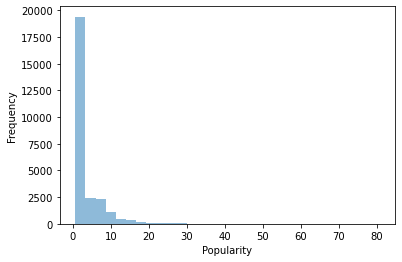

In [81]:
# Graphing descriptive statistics for the data frame (histogram)
ax = sorted_popularity_tmdb_movies_df["popularity"].plot.hist(bins=30, alpha=0.5)
ax.set_xlabel("Popularity")
ax.set_ylabel("Frequency")


In [ ]:
# Graphing descriptive statistics for the data frame (histogram) Left skewed
ax = sorted_popularity_tmdb_movies_df["popularity"].plot.hist(bins=30, alpha=0.5)
ax.set_xlabel("Popularity")
ax.set_ylabel("Frequency")


Text(17.200000000000003, 0.5, 'Frequency')

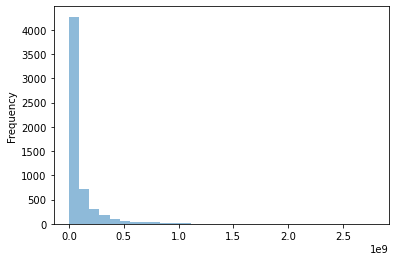

In [87]:
# Graphing descriptive statistics for the data frame (histogram) Left skewed
sorted_worldwide_gross_movie_budgets_df["worldwide_gross"].plot.hist(bins=30, alpha=0.5)
ax.set_xlabel("worldwide_gross")
ax.set_ylabel("Frequency")

Text(17.200000000000003, 0.5, 'Frequency')

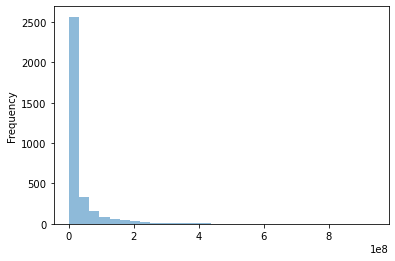

In [88]:
# Graphing descriptive statistics for the data frame (histogram) Left skewed
sorted_movie_gross_domestic_df["domestic_gross"].plot.hist(bins=30, alpha=0.5)
ax.set_xlabel("domestic_gross")
ax.set_ylabel("Frequency")

In [101]:
import seaborn as sns

We can see that the relationship between popularity and vote average is fairly normally distributed, as well as vote count and vote average. 

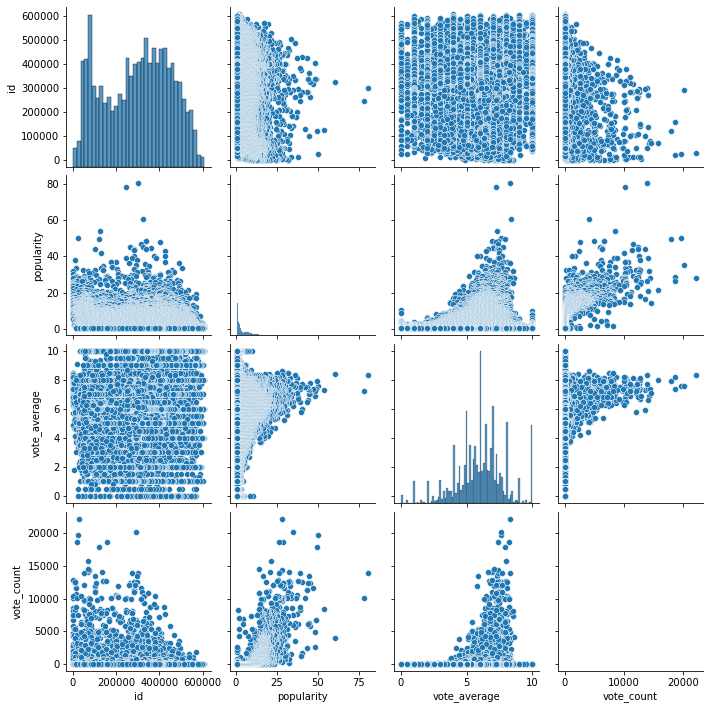

In [103]:
sns.pairplot(sorted_popularity_tmdb_movies_df)

In general we can see below that there is a positive correlation between production budget and domestic and worldwide gross of a movie.

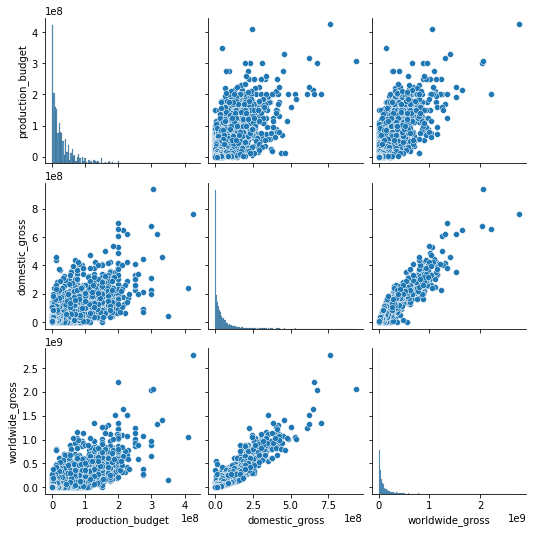

In [105]:
sns.pairplot(sorted_worldwide_gross_movie_budgets_df)

# Conclusion

Through my analysis I found that the most popular movies in the box office over the past 10 years have been in the genre's of "Action" and "Adventure" (the most popular being "Action").

In general there is a positive correlation between production budget and worldwide/domestic gross. 

Director James Cameron had the 2 highest grossing movies according to the movie budgets data set. 

## Recommendations

Based on my findings I would recommend that Microsoft should create movies that are within the "Action" and "Adventure" genres as they have produced the highest grossing films. 

I would recommend that Microsoft be prepared to investment more money into the production budget. Higher production budgets are more likely to lead to a higher grossing film. 

Hiring a top producer such as James Cameron (who has been proven to create the highest grossing films) would be highly beneficial in creating a potential best selling/successful movie. 

## Limitations

One limitation that I found while investigating the data sets was that there were too many missing values in certain data sets which effected my ability to use it. The biggest limitation was the lack of information on net profit for production companies. Having this information would help in determining a movie's a success. 

## Next Steps

# More Information